Chi-square test p-value: 0.9329


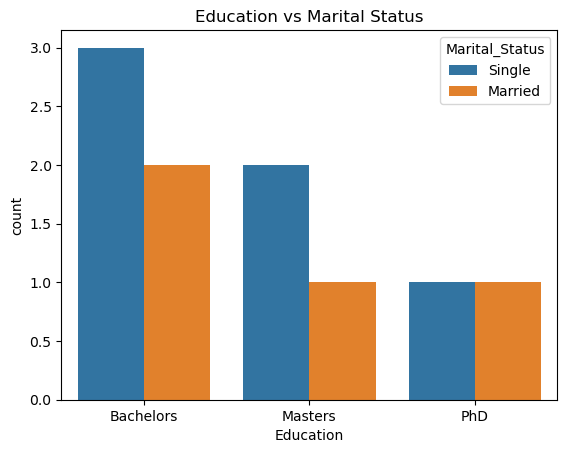

   ID   Age  Gender  Income  Education Marital_Status  Years_Employed  \
0   1  28.0    Male   55000  Bachelors         Single             3.0   
1   2  34.0  Female   62000    Masters        Married            10.0   
2   3  29.0  Female   58000  Bachelors        Married             5.0   
3   4  40.0    Male   72000        PhD         Single            12.0   
4   5   NaN  Female   68000  Bachelors         Single             7.0   
5   6  50.0    Male   80000    Masters         Single            20.0   
6   7  45.0    Male   75000  Bachelors        Married             7.0   
7   8  38.0  Female   69000        PhD        Married             9.0   
8   9  33.0    Male   62000    Masters         Single             6.0   
9  10  29.0  Female   64000  Bachelors         Single             4.0   

   Satisfaction_Level Satisfaction_Binary  Education_Num  Marital_Status_Num  
0                0.70                 Low              1                   0  
1                0.80                H

In [1]:

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [28, 34, 29, 40, np.nan, 50, 45, 38, 33, 29],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female'],
    'Income': [55000, 62000, 58000, 72000, 68000, 80000, 75000, 69000, 62000, 64000],
    'Education': ['Bachelors', 'Masters', np.nan, 'PhD', 'Bachelors', 'Masters', 'Bachelors', 'PhD', 'Masters', 'Bachelors'],
    'Marital_Status': ['Single', 'Married', 'Married', 'Single', 'Single', np.nan, 'Married', 'Married', 'Single', 'Single'],
    'Years_Employed': [3, 10, 5, 12, 7, 20, np.nan, 9, 6, 4],
    'Satisfaction_Level': [0.7, 0.8, 0.6, 0.9, 0.5, 0.85, 0.65, np.nan, 0.7, 0.6]
}

df = pd.DataFrame(data)

df['Education'].fillna(df['Education'].mode()[0], inplace=True)
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)
df['Satisfaction_Level'].fillna(df['Satisfaction_Level'].median(), inplace=True)
df['Years_Employed'].fillna(df['Years_Employed'].median(), inplace=True)

df['Satisfaction_Binary'] = df['Satisfaction_Level'].apply(lambda x: 'High' if x > 0.7 else 'Low')

education_map = {'Bachelors': 1, 'Masters': 2, 'PhD': 3}
df['Education_Num'] = df['Education'].map(education_map)

marital_map = {'Single': 0, 'Married': 1}
df['Marital_Status_Num'] = df['Marital_Status'].map(marital_map)

Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

contingency_table = pd.crosstab(df['Education'], df['Marital_Status'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square test p-value: {p:.4f}")

sns.countplot(data=df, x='Education', hue='Marital_Status')
plt.title('Education vs Marital Status')
plt.show()

print(df)
